In [47]:

#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [48]:
#Cargamos el dataset 
Datos = pd.read_csv('./Titanic-Dataset.csv')
Datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# estadisticas del dataset
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
#para revisar datos vacios en Columnas
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 0, 'Age')

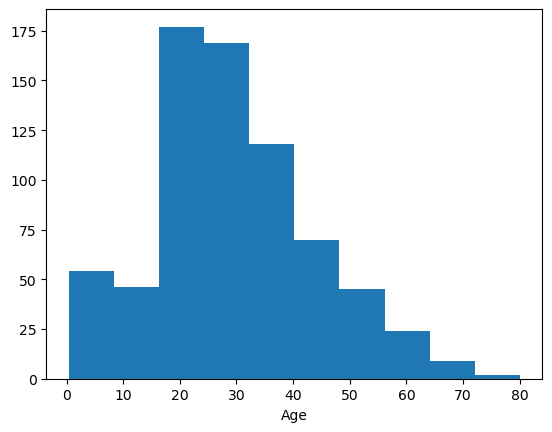

In [51]:
# Grafica de histograma de edad.
plt.hist(Datos.Age)
plt.xlabel('Age')

In [52]:
# Elimina las columnas que no son necesarias
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'Embarked']
Datos.drop(columns=columnas_a_eliminar, inplace=True)


In [53]:
#se cambian los generos por valores enteros
Datos['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [54]:
# Calcula la moda de la columna "Age"
age_mode = Datos['Age'].mode()[0]

# Rellena los valores nulos en la columna "Age" con la moda
Datos['Age'].fillna(age_mode, inplace=True)


In [55]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [56]:
# definimos las variables de predicción y la variable objetivo
predictors_col = [col for col in Datos.columns if col != 'Survived']
target_col = ['Survived']

In [57]:
# division en dos partes del dataset,  predicción y datos objetivo
predictors = Datos[predictors_col]
target = Datos[target_col]

In [58]:
predictors

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,3,1,24.0,1,2,23.4500
889,890,1,0,26.0,0,0,30.0000


In [59]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [60]:
# definición de  matriz de correlacion.
corr = predictors.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.042939,0.036186,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.131900,-0.356187,0.083081,0.018443,-0.549500
Sex,-0.042939,-0.131900,1.000000,-0.073377,0.114631,0.245489,0.182333
Age,0.036186,-0.356187,-0.073377,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.057527,0.083081,0.114631,-0.232411,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.245489,-0.155118,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.182333,0.107554,0.159651,0.216225,1.000000


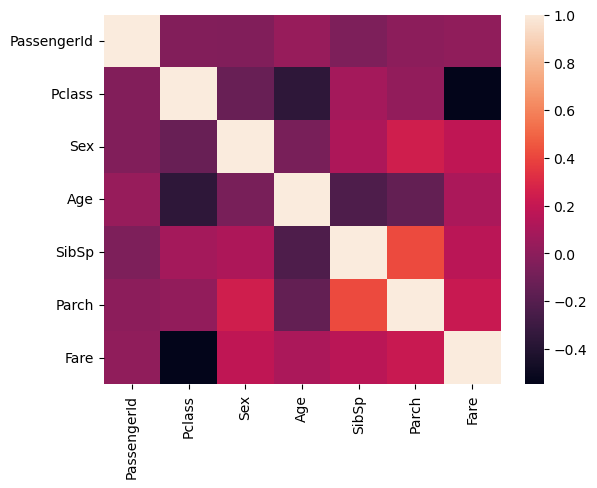

In [61]:
#grafica de correlacón 
sns.heatmap(corr)
plt.show()

In [62]:
# creacion de datos de entrenamiento  y de test.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=13)

In [63]:
# creacion de un modelo de árboles de decisión utilizando el algoritmo DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [64]:
# entrenamiento de el modelo de arbol de desición
arbol = tree.fit(X_train, y_train)

[Text(0.512060072815534, 0.9705882352941176, 'x[2] <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(0.21253033980582525, 0.9117647058823529, 'x[3] <= 13.0\ngini = 0.319\nsamples = 411\nvalue = [329, 82]'),
 Text(0.04854368932038835, 0.8529411764705882, 'x[4] <= 2.5\ngini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(0.038834951456310676, 0.7941176470588235, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.05825242718446602, 0.7941176470588235, 'x[0] <= 222.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.04854368932038835, 0.7352941176470589, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.06796116504854369, 0.7352941176470589, 'x[0] <= 270.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05825242718446602, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07766990291262135, 0.6764705882352942, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3765169902912621, 0.8529411764705882, 'x[6] <= 26.269\ngini = 0.282\nsamples 

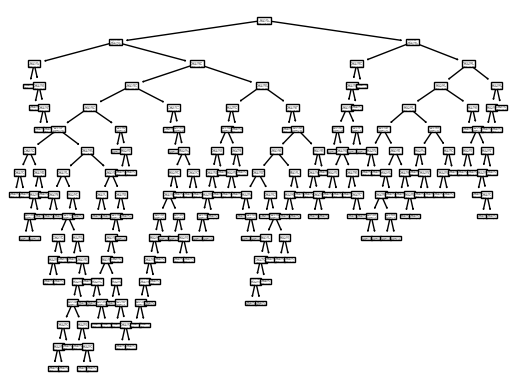

In [65]:
plot_tree(arbol)

In [66]:
# configuramos  la variable que contendra las predicciones utilizando el modelo de árbol de decisión (arbol) entrenado en un conjunto de datos de prueba (X_test).
predicciones = arbol.predict(X_test)

In [67]:
predicciones

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [68]:
# Examinamos la matriz de confusión  para evaluar el rendimiento del modelo
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,133,38
1,29,68


In [69]:
accuracy = accuracy_score(y_test,predicciones)
print("accuracy", accuracy)
f1 = f1_score(y_test, predicciones, average='weighted')
print("F1-Score:", f1)
recall = recall_score(y_test, predicciones, average='weighted')
print("Recall:", recall)

accuracy 0.75
F1-Score: 0.7521634935428038
Recall: 0.75


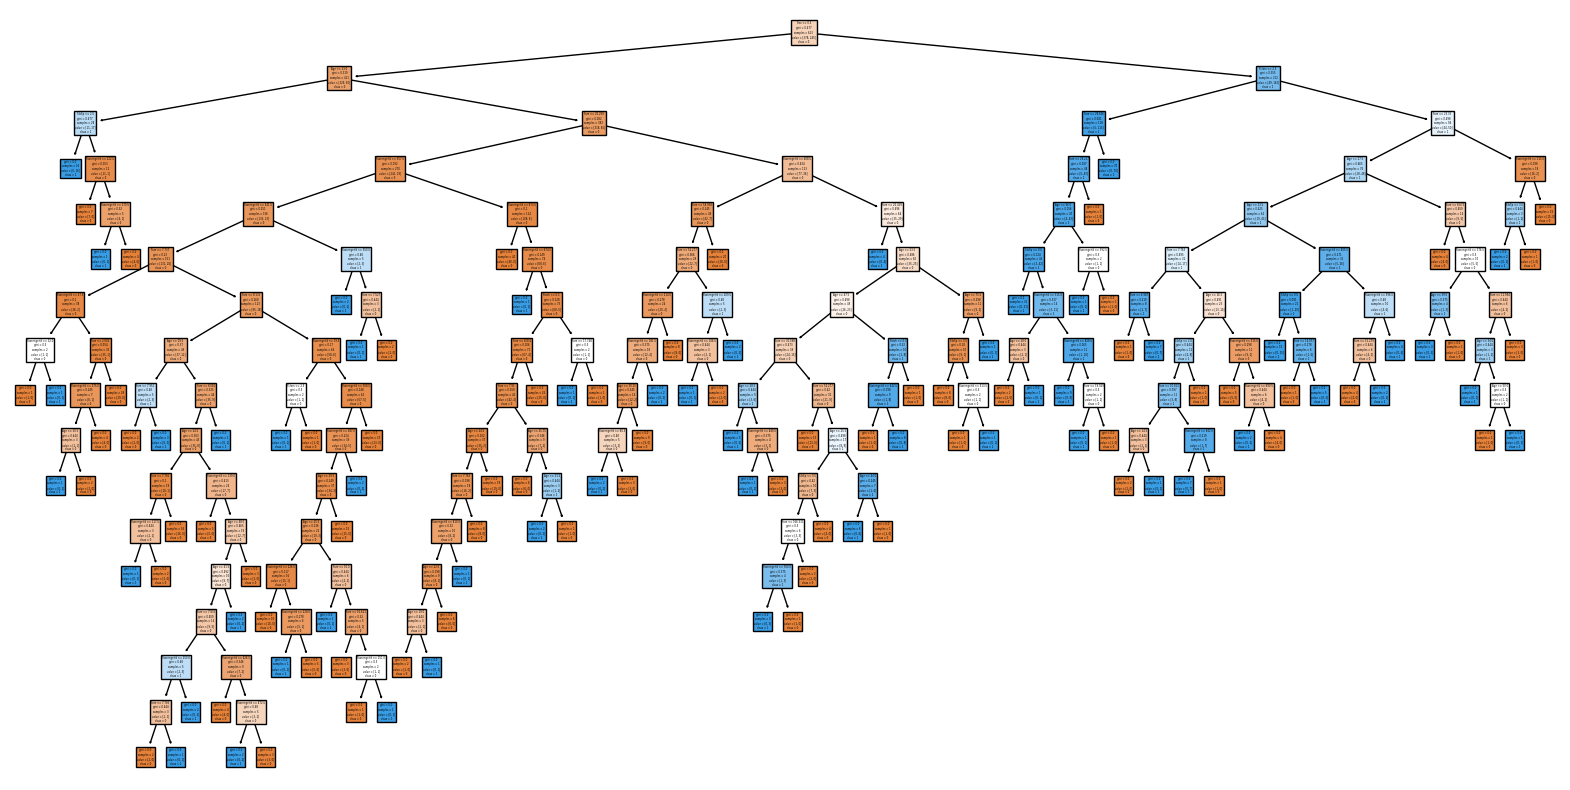

In [70]:
class_names = target['Survived'].unique().astype(str)
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=class_names)
plt.show()

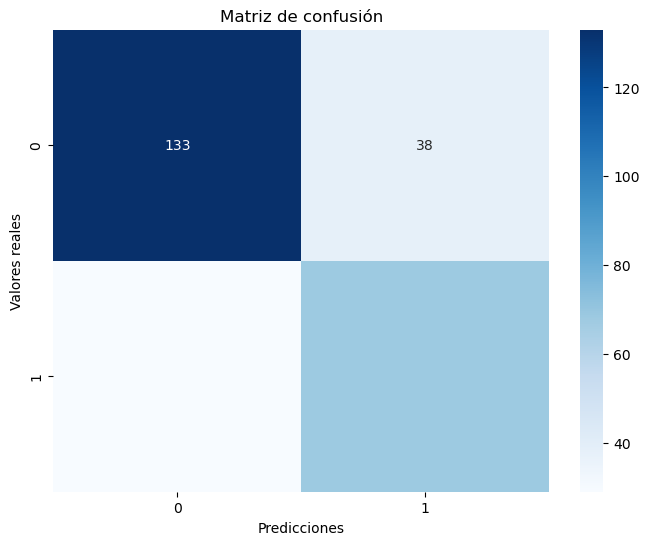

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()